Training Self-Organizing Map...
Epoch 0/100
Epoch 10/100
Epoch 20/100
Epoch 30/100
Epoch 40/100
Epoch 50/100
Epoch 60/100
Epoch 70/100
Epoch 80/100
Epoch 90/100


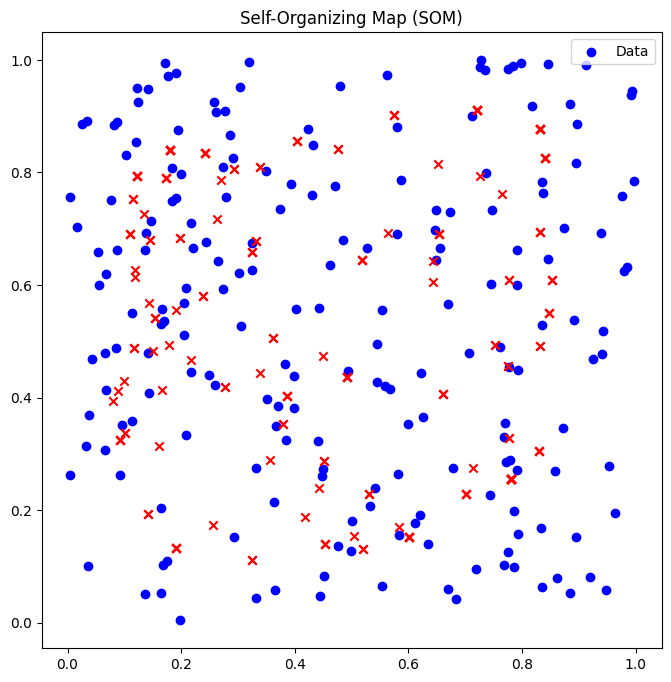

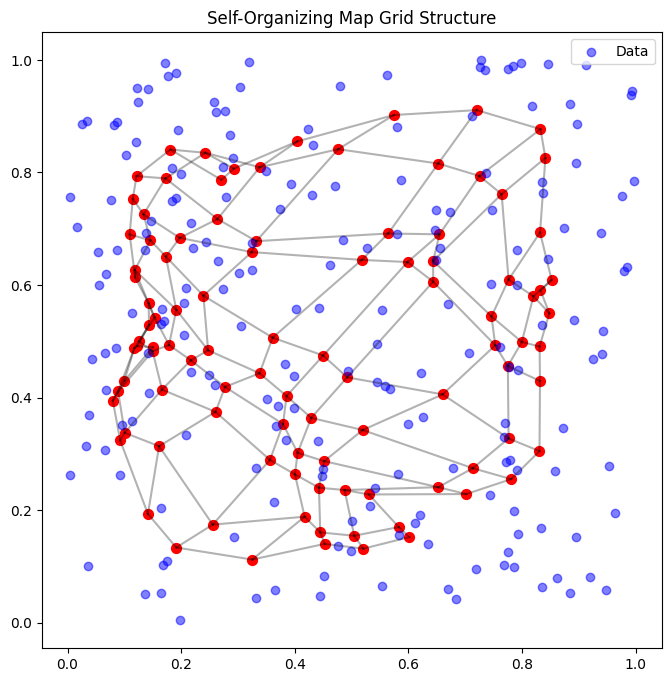

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SelfOrganizingMap:
    def __init__(self, m, n, dim, learning_rate=0.5, radius=None, epochs=1000):
        """
        Initialize Self-Organizing Map

        Args:
            m: Number of rows in the map
            n: Number of columns in the map
            dim: Dimensionality of input data
            learning_rate: Initial learning rate
            radius: Initial radius for neighborhood function (default: max(m,n)/2)
            epochs: Number of training epochs
        """
        self.m = m
        self.n = n
        self.dim = dim
        self.learning_rate = learning_rate
        self.epochs = epochs

        if radius is None:
            self.radius = max(m, n) / 2
        else:
            self.radius = radius

        # Initialize weights randomly
        self.weights = np.random.rand(m, n, dim)

    def find_bmu(self, x):
        """
        Find the Best Matching Unit (BMU) for input x

        Args:
            x: Input vector

        Returns:
            bmu_index: Index of the BMU
        """
        distances = np.linalg.norm(self.weights - x, axis=2)
        bmu_index = np.unravel_index(np.argmin(distances), (self.m, self.n))
        return bmu_index

    def train(self, data):
        """
        Train the Self-Organizing Map

        Args:
            data: Training data of shape (n_samples, dim)
        """
        time_constant = self.epochs / np.log(self.radius)

        for epoch in range(self.epochs):
            # Randomly select a data point
            bmu_index = self.find_bmu(data[epoch % len(data)])

            # Calculate learning rate for this epoch
            lr = self.learning_rate * np.exp(-epoch / self.epochs)

            # Calculate radius for this epoch
            rad = self.radius * np.exp(-epoch / time_constant)

            # Update weights
            for i in range(self.m):
                for j in range(self.n):
                    # Calculate distance from BMU
                    dist_to_bmu = np.sqrt((i - bmu_index[0])**2 + (j - bmu_index[1])**2)

                    # Calculate influence based on distance
                    if dist_to_bmu <= rad:
                        influence = np.exp(-(dist_to_bmu**2) / (2 * (rad**2)))

                        # Update weights
                        self.weights[i, j] += lr * influence * (data[epoch % len(data)] - self.weights[i, j])

            # Print progress every 10% of epochs
            if epoch % (self.epochs // 10) == 0:
                print(f"Epoch {epoch}/{self.epochs}")

    def map_vects(self, data):
        """
        Map input vectors to their BMU locations

        Args:
            data: Input data

        Returns:
            List of BMU indices for each data point
        """
        return [self.find_bmu(x) for x in data]


# Main execution
if __name__ == "__main__":
    # Generate random data
    data = np.random.rand(200, 2)

    # Create and train SOM
    som = SelfOrganizingMap(m=10, n=10, dim=2, learning_rate=0.5, epochs=100)

    print("Training Self-Organizing Map...")
    som.train(data)

    # Map data points to SOM
    mapped = som.map_vects(data)

    # Visualization
    plt.figure(figsize=(8, 8))

    # Plot the data points
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data')

    # Plot SOM weights
    for i, m in enumerate(mapped):
        plt.scatter(som.weights[m[0], m[1], 0],
                   som.weights[m[0], m[1], 1],
                   c='red',
                   marker='x')

    plt.title("Self-Organizing Map (SOM)")
    plt.legend()
    plt.show()

    # Additional visualization: Plot the SOM grid
    plt.figure(figsize=(8, 8))

    # Plot grid connections
    for i in range(som.m):
        for j in range(som.n):
            # Horizontal connections
            if j < som.n - 1:
                plt.plot([som.weights[i, j, 0], som.weights[i, j+1, 0]],
                        [som.weights[i, j, 1], som.weights[i, j+1, 1]],
                        'k-', alpha=0.3)
            # Vertical connections
            if i < som.m - 1:
                plt.plot([som.weights[i, j, 0], som.weights[i+1, j, 0]],
                        [som.weights[i, j, 1], som.weights[i+1, j, 1]],
                        'k-', alpha=0.3)

    # Plot the neurons
    for i in range(som.m):
        for j in range(som.n):
            plt.scatter(som.weights[i, j, 0],
                       som.weights[i, j, 1],
                       c='red',
                       marker='o',
                       s=50)

    # Plot data points
    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5, label='Data')

    plt.title("Self-Organizing Map Grid Structure")
    plt.legend()
    plt.show()